In [3]:

from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd


data=pd.read_csv("data2.csv",na_values='?')
data=data.fillna(data.mean())


In [4]:

x = data.drop(['class'],axis=1).values
y = data['class'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(277, 7) (277,)
(120, 7) (120,)


In [5]:
clf=GaussianNB()
clf.fit(x_train,y_train)
print(clf)


GaussianNB()


In [6]:
y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)
print(sum(y_train==y_pred_train)/len(y_train))
print(sum(y_test==y_pred_test)/len(y_test))

0.7003610108303249
0.6583333333333333


In [7]:
print(sum(y_train==1),sum(y_train==2),sum(y_train==3))
clf1=GaussianNB(priors=[171/277,50/277,56/277])
clf1.fit(x_train,y_train)

y_pred_train=clf1.predict(x_train)
y_pred_test=clf1.predict(x_test)
print(sum(y_train==y_pred_train)/len(y_train))
print(sum(y_test==y_pred_test)/len(y_test))

171 47 59
0.703971119133574
0.6666666666666666


0.6246851385390428
0.17632241813602015
0.19899244332493704
0.703971119133574
0.6583333333333333


/usr/local/Caskroom/miniconda/base/envs/geospatial/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


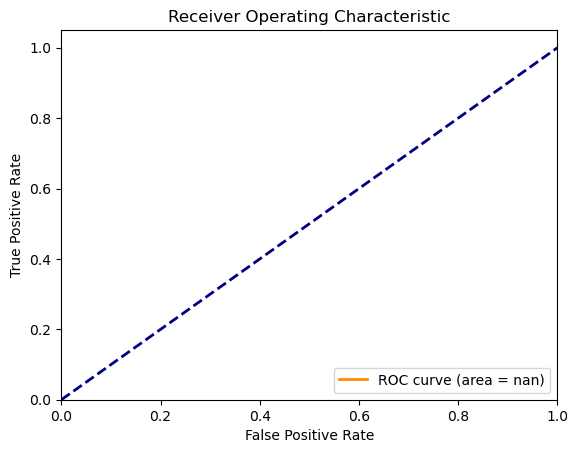

In [9]:
h=sum(y==1)+sum(y==2)+sum(y==3)
print(sum(y==1)/h)
print(sum(y==2)/h)
print(sum(y==3)/h)

clf2=GaussianNB(priors=[sum(y==1)/h,sum(y==2)/h,sum(y==3)/h])
clf2.fit(x_train,y_train)

y_pred_train=clf2.predict(x_train)
y_pred_test=clf2.predict(x_test)
print(sum(y_train==y_pred_train)/len(y_train))
print(sum(y_test==y_pred_test)/len(y_test))

y_score = clf2.predict_proba(x_test)[:, 1]

# 计算 ROC 曲线的参数
from  sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_score,pos_label='class')
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()